In [46]:
import numpy as np 
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



In [47]:
df = pd.read_excel('data\Tabla_airbnb.xlsx')
df.info()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vitta\AppData\Local\Temp\ipykernel_10648\3487073556.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('data\Tabla_airbnb.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                220031 non-null  int64  
 1   nombre_apartamento                219947 non-null  object 
 2   id_anfitrion                      220031 non-null  int64  
 3   nombre_anfitrion                  219324 non-null  object 
 4   zona                              220031 non-null  object 
 5   barrio                            220031 non-null  object 
 6   latitud                           220031 non-null  float64
 7   longitud                          220031 non-null  float64
 8   tipo_alojamiento                  220031 non-null  object 
 9   precio_local                      220031 non-null  int64  
 10  duracion_minima                   220031 non-null  int64  
 11  numero_de_opiniones               220031 non-null  i

In [48]:
df = df.drop(['nombre_apartamento', 'id_anfitrion', 'nombre_anfitrion', 'latitud', 'longitud', 'propiedades_por_host', 'fecha_publicacion_estimada','ingreso_mensual_estimado', 'noches_ocupadas_mensual_estimado', 'fecha_ultima_opinion'], axis=1)
df.head()

,id,zona,barrio,tipo_alojamiento,precio_local,duracion_minima,numero_de_opiniones,opiniones_por_mes,disponibilidad_anual,2,precio_usd,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,tasa_ocupacion
0,279769,Central,Tower Hamlets,Private room,70,1,0,0.0,0,London,90.58,81.19,False,0.0,0.0,0.0,0.0
1,582625,Central,Tower Hamlets,Private room,59,1,0,0.0,0,London,76.35,68.43,False,0.0,0.0,0.0,0.0
2,1939814,Central,Tower Hamlets,Private room,69,1,0,0.0,0,London,89.29,80.03,False,0.0,0.0,0.0,0.0
3,2096176,Central,Tower Hamlets,Private room,50,1,0,0.0,0,London,64.70,57.99,False,0.0,0.0,0.0,0.0
4,3217563,Central,Tower Hamlets,Private room,55,1,0,0.0,0,London,71.17,63.79,False,0.0,0.0,0.0,0.0


In [49]:
df.drop('precio_usd', axis=1, inplace=True)

In [50]:
df.drop('precio_local', axis=1, inplace=True)

In [51]:
df.rename(columns={2:'city'}, inplace=True)

In [52]:
print(df['city'].unique())
df = df[df['city'].str.lower() == 'madrid']
df.info()
df.head()
df.drop('city', axis=1, inplace=True)
df.head()


['London' 'Ny' 'Sydney' 'Madrid' 'Milan' 'Tokyo']
<class 'pandas.core.frame.DataFrame'>
Index: 19618 entries, 14736 to 216195
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19618 non-null  int64  
 1   zona                            19618 non-null  object 
 2   barrio                          19618 non-null  object 
 3   tipo_alojamiento                19618 non-null  object 
 4   duracion_minima                 19618 non-null  int64  
 5   numero_de_opiniones             19618 non-null  int64  
 6   opiniones_por_mes               19618 non-null  float64
 7   disponibilidad_anual            19618 non-null  int64  
 8   city                            19618 non-null  object 
 9   precio_eur                      19618 non-null  float64
 10  sector_lujo                     19618 non-null  bool   
 11  reservas_mensual_estimado       19618 non-n

,id,zona,barrio,tipo_alojamiento,duracion_minima,numero_de_opiniones,opiniones_por_mes,disponibilidad_anual,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,tasa_ocupacion
14736,3093756,Centro,Embajadores,Entire home/apt,7,0,0.0,0,27.0,False,0.0,0.0,0.0,0.0
14737,3211626,Centro,Embajadores,Entire home/apt,7,0,0.0,0,150.0,False,0.0,0.0,0.0,0.0
14738,3550820,Centro,Cortes,Private room,20,0,0.0,0,24.0,False,0.0,0.0,0.0,0.0
14739,3841991,Centro,Justicia,Entire home/apt,5,0,0.0,0,85.0,False,0.0,0.0,0.0,0.0
14740,4703720,Centro,Embajadores,Entire home/apt,4,0,0.0,0,100.0,False,0.0,0.0,0.0,0.0


In [53]:
df.drop('barrio', axis=1, inplace=True)


In [54]:
df = pd.get_dummies(df, columns=['zona', 'tipo_alojamiento'], prefix=['zona', 'type'], drop_first=True)
df.head()


,id,duracion_minima,numero_de_opiniones,opiniones_por_mes,disponibilidad_anual,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,...,zona_Salamanca,zona_San Blas - Canillejas,zona_Tetuán,zona_Usera,zona_Vicálvaro,zona_Villa de Vallecas,zona_Villaverde,type_Hotel room,type_Private room,type_Shared room
14736,3093756,7,0,0.0,0,27.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
14737,3211626,7,0,0.0,0,150.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
14738,3550820,20,0,0.0,0,24.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
14739,3841991,5,0,0.0,0,85.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
14740,4703720,4,0,0.0,0,100.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df['type_apt'] = ~(df['type_Hotel room'] | df['type_Private room'] | df['type_Shared room'])
df.head()

,id,duracion_minima,numero_de_opiniones,opiniones_por_mes,disponibilidad_anual,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,...,zona_San Blas - Canillejas,zona_Tetuán,zona_Usera,zona_Vicálvaro,zona_Villa de Vallecas,zona_Villaverde,type_Hotel room,type_Private room,type_Shared room,type_apt
14736,3093756,7,0,0.0,0,27.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
14737,3211626,7,0,0.0,0,150.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
14738,3550820,20,0,0.0,0,24.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
14739,3841991,5,0,0.0,0,85.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
14740,4703720,4,0,0.0,0,100.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


# Modelo


In [56]:
#division de los datos en X y Y 
x = df.drop('ingreso_anual_estimado', axis=1)
y = df['ingreso_anual_estimado']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((15694, 34), (3924, 34))

In [57]:
#crear y entrenar el modelo
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model_xgb.fit(x_train, y_train)

#predicciones
y_pred = model_xgb.predict(x_test)

#evaluar el modelo calcuulando métriucas de regresion
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model_xgb.score(x_test, y_test)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MSE: 521197115.11021787
RMSE: 22829.74189758215
R2: 0.5767411461640197


In [58]:
#calculo del accuracy
y_test_class = (y_test > y_test.mean()).astype(int)
y_pred_class = (y_pred > y_pred.mean()).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9821610601427115


Métricas de evaluación:
RMSE: 22829.74
R2 Score: 0.58

Primeras 10 predicciones:
        Valor Real    Predicción  Diferencia
130332    219.1308    335.236786 -116.105986
185220    928.7328   1027.800659  -99.067859
189831   1284.8196   1131.304932  153.514668
205290      0.0000    175.112152 -175.112152
145731    639.5028    462.454559  177.048241
108259      0.0000    -48.734154   48.734154
18681     229.5648    475.745667 -246.180867
26560   21487.3044  22163.089844 -675.785444
145713    585.0000    748.065430 -163.065430
140166   4658.3856   4693.453125  -35.067525

Estadísticas de las diferencias:
count    3.924000e+03
mean    -6.241254e+02
std      2.282412e+04
min     -1.039613e+06
25%     -2.056008e+02
50%     -1.608032e+01
75%      1.861899e+02
max      7.592612e+04
Name: Diferencia, dtype: float64

Error porcentual promedio: inf%


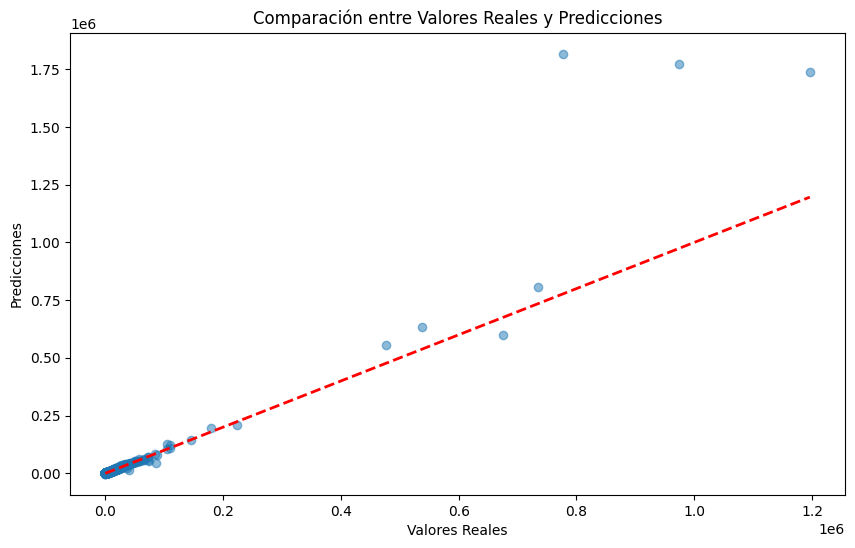

In [59]:
# Hacer predicciones con X_test
y_pred = model_xgb.predict(x_test)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': y_pred,
    'Diferencia': y_test - y_pred
})

# Mostrar métricas y algunos resultados
print("Métricas de evaluación:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score: {model_xgb.score(x_test, y_test):.2f}")

# 4. Mostrar primeros 10 resultados
print("\nPrimeras 10 predicciones:")
print(resultados.head(10))

# Estadísticas básicas de las diferencias
print("\nEstadísticas de las diferencias:")
print(resultados['Diferencia'].describe())

# Calcular el error porcentual
resultados['Error_Porcentual'] = abs(resultados['Diferencia'] / resultados['Valor Real'] * 100)
print("\nError porcentual promedio: {:.2f}%".format(resultados['Error_Porcentual'].mean()))

# Visualizar resultados (opcional, si tienes matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()


Importancia de características:
                    caracteristica  importancia
5                       precio_eur     0.496746
8   noches_ocupadas_anual_estimado     0.274089
3                opiniones_por_mes     0.106067
2              numero_de_opiniones     0.063494
1                  duracion_minima     0.039324
0                               id     0.011464
9                   tasa_ocupacion     0.003501
4             disponibilidad_anual     0.002259
25                     zona_Tetuán     0.001902
33                        type_apt     0.000968


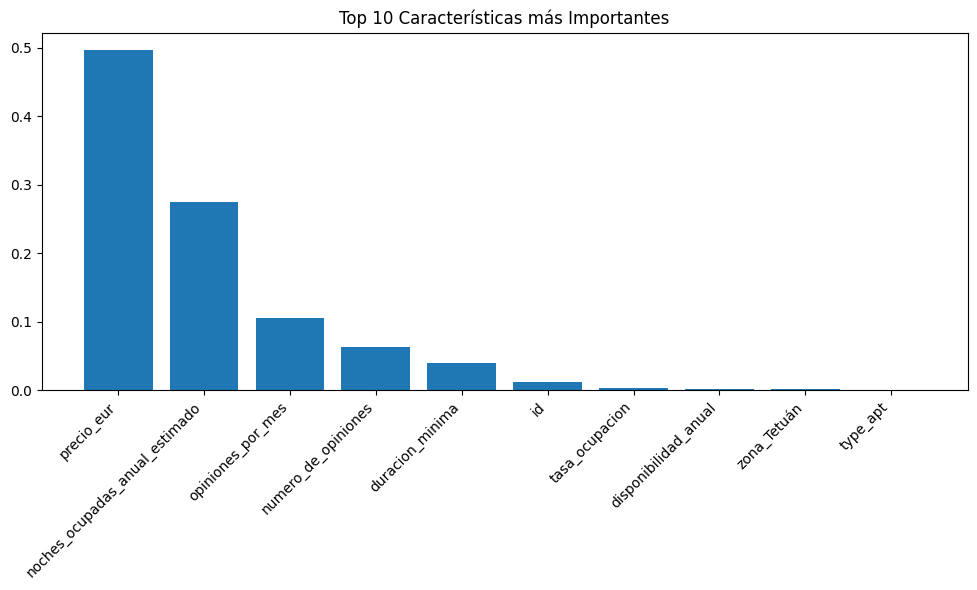

In [60]:
# Importancia de características
importancia = pd.DataFrame({
    'caracteristica': x.columns,
    'importancia': model_xgb.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

print("\nImportancia de características:")
print(importancia.head(10))

# Visualizar importancia de características
plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristica'][:10], importancia['importancia'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Características más Importantes')
plt.tight_layout()
plt.show()

In [61]:
import joblib

# Guardar el modelo
joblib.dump(model_xgb, 'model_ingresos_madrid.pkl')

['model_ingresos_madrid.pkl']

Calcular medias y moda para datos predefinidos:

In [62]:
df.head()

,id,duracion_minima,numero_de_opiniones,opiniones_por_mes,disponibilidad_anual,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,...,zona_San Blas - Canillejas,zona_Tetuán,zona_Usera,zona_Vicálvaro,zona_Villa de Vallecas,zona_Villaverde,type_Hotel room,type_Private room,type_Shared room,type_apt
14736,3093756,7,0,0.0,0,27.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
14737,3211626,7,0,0.0,0,150.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
14738,3550820,20,0,0.0,0,24.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
14739,3841991,5,0,0.0,0,85.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
14740,4703720,4,0,0.0,0,100.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [71]:
media_numero_opiniones = df['numero_de_opiniones'].mean()
moda_numero_opiniones = df['numero_de_opiniones'].mode()[0]
media_opiniones_por_mes = df['opiniones_por_mes'].mean()
media_reservas_mensual_estimado = df['reservas_mensual_estimado'].mean()
media_noches_ocupadas_anual_estimado = df['noches_ocupadas_anual_estimado'].mean()
media_tasa_ocupacion = df['tasa_ocupacion'].mean()
media_ingreso_anual_estimado = df['ingreso_anual_estimado'].mean()

print(f'Media de número de opiniones: {media_numero_opiniones}')
print(f'Moda de número de opiniones: {moda_numero_opiniones}')
print(f'Media de opiniones por mes: {media_opiniones_por_mes}')
print(f'Media de reservas mensuales estimado: {media_reservas_mensual_estimado}')
print(f'Media de noches ocupadas anual estimado: {media_noches_ocupadas_anual_estimado}')
print(f'Media de tasa de ocupación: {media_tasa_ocupacion}')
print(f'Media de ingreso anual estimado: {media_ingreso_anual_estimado}')


Media de número de opiniones: 31.858803139973492
Moda de número de opiniones: 0
Media de opiniones por mes: 0.8024273626261595
Media de reservas mensuales estimado: 1.246005221469192
Media de noches ocupadas anual estimado: 65.95005549314895
Media de tasa de ocupación: 0.24932575895218748
Media de ingreso anual estimado: 7190.042522887144
